#  <font color='blue'>Title: GeoBC DSS AGO Project Groups Creation </font>
#### Author: Jason Xiao(jason.xiao@gov.bc.ca)

##### <span style='background :yellow'> Purpose: Create two groups(VIEW AND EDIT) for new AGO project in DSS Proxy Account.  </span>
##### <span style='background :yellow'> Update info:
    Jan 4, 2021. 
    Feb 2, 2021: ESRI Group 'create' function has bugs. it does not work. change it to 'create_from_dict'.
</span>
**************************************************************************************************************************


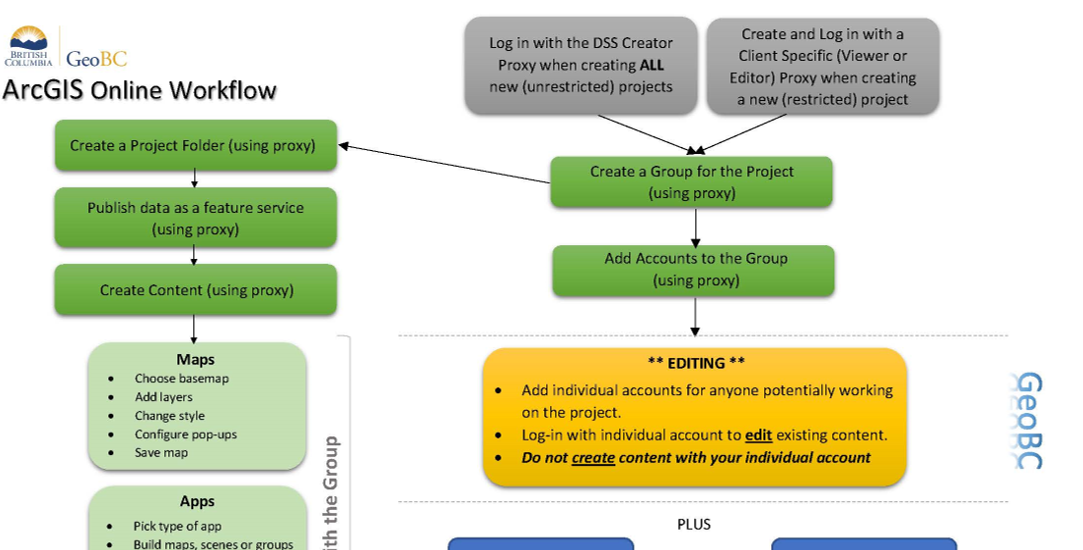

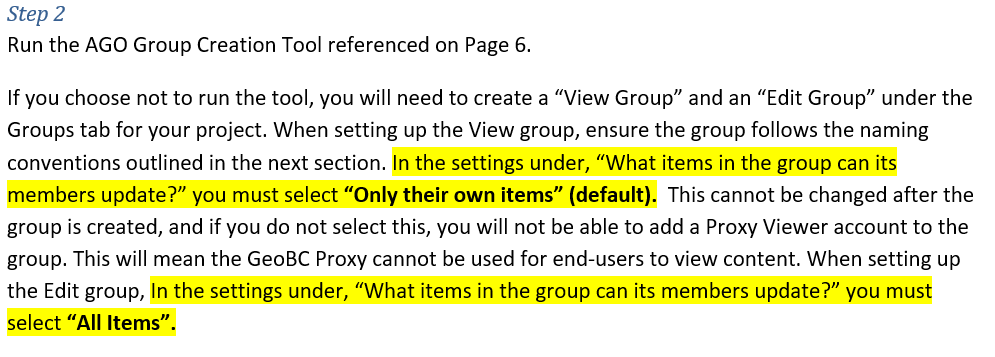

### Import modules and connect AGO account

In [1]:
import arcgis
from IPython.display import display
url = 'http://www.arcgis.com'
username = 'PX.GeoBC.DSS.Creator'

password = arcpy.GetParameterAsText(0)
gis = arcgis.GIS(url, username, password)

### Define  tool paramerters and group dictionaries

In [ ]:
group_title = arcpy.GetParameterAsText(1)
group_tag = arcpy.GetParameterAsText(2)
group_description = arcpy.GetParameterAsText(3)
group_snippet = arcpy.GetParameterAsText(4)
View_group_Boolean = arcpy.GetParameterAsText(5)
edit_group_title = 'GeoBC - DSS - ' + group_title + ' - Edit'
view_group_title = 'GeoBC - DSS - ' + group_title + ' - View'

edit_group_dict ={'title':edit_group_title,'tags':group_tag,
            'description':group_description,'snippet':group_snippet,
            'isViewOnly':'False','access':'org', 'isInvitationOnly':'False',
             'sortField':'title', 'sortOrder':'asc',
             'capabilities':'updateitemcontrol'
            }


view_group_dict ={'title':view_group_title,'tags':group_tag,
            'description':group_description,'snippet':group_snippet,
            'isViewOnly':'False','access':'org', 'isInvitationOnly':'False',
             'sortField':'title', 'sortOrder':'asc'
             #'capabilities':'updateitemcontrol'
            }


    

In [ ]:
if str(View_group_Boolean) == 'true':
    arcpy.AddMessage("Only create project VIEW group.")
    view_group = gis.groups.create_from_dict(view_group_dict)
    #print("Group {} View has created.".format(group_title))
    arcpy.AddMessage("Group {} View has created.".format(view_group_title))
    view_group.protected = True  # set the group can not be deleted by accident.!!!!!!!!!!!
    


else:
    view_group = gis.groups.create_from_dict(view_group_dict)
    print("Group {} View has created.".format(view_group_title))
    arcpy.AddMessage("Group {} View has created.".format(view_group_title))
    view_group.protected = True  # set the group can not be deleted by accident.
    
    edit_group = gis.groups.create_from_dict(edit_group_dict)
    print("Group {} Edit has been created.".format(edit_group_title))
    arcpy.AddMessage("Group {} Edit has been created.".format(edit_group_title))
    edit_group.protected = True  # set the group can not be deleted by accident.
    

#### Create a folder in DSS Proxy Account

In [ ]:
##### Create a folder in DSS Proxy account(PX.GeoBC.DSS.Creator)
gis.content.create_folder(folder = 'DSS ' + group_title)
print("Folder {} has been created.".format(group_title))
arcpy.AddMessage("Folder {} Edit has been created.".format(group_title))

      